# Análisis de Clientes de Banco
__________________________________________________________________________________________________________________________

## Introducción

Un banco, también conocido como entidad de crédito o entidad de depósito es una empresa financiera que acepta depósitos del público y crea depósitos a la vista, que comúnmente se llaman cuentas bancarias.

Hoy en día todo el mundo tiene conocimiento aunque sea básico de lo que es un banco y como funciona, ya que cuentan con una cuenta de banco. En este proyecto vamos a extraer datos que nos de una idea del comportamiento de los clientes y nos ayude a responder ciertas interrogantes.


## Fuentes
Dataset: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers


## Objetivos

Responder las siguientes preguntas:

    1. Cual es el impacto del nivel de educación en el ingreso de las personas.
    2. Hay influencia a nivel de género con el salario?
    3. Qué género es más propenso a abandonar el banco.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns = None

In [3]:
df= pd.read_csv('BankChurners.csv', sep=',', decimal='.')


In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Verificando valores nulos

In [5]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Verificando los tipos de datos de las columnas

In [7]:
df.dtypes.to_frame()

,0
CLIENTNUM,int64
Attrition_Flag,object
Customer_Age,int64
Gender,object
Dependent_count,int64
Education_Level,object
Marital_Status,object
Income_Category,object
Card_Category,object
Months_on_book,int64


### Eliminar columnas innecesarias

In [8]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [9]:
df_2= df[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       #'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       #'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
     #'Avg_Utilization_Ratio',
       #'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       #'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      
]].copy()

In [10]:
df_2.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0


## Cual es el impacto del nivel de educación en el ingreso de las personas?

In [11]:
df['Income_Category'].unique() #verificar los valores unicos de la columna "Income_Category"

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [12]:
df['Education_Level'].unique() #verificar los valores unicos de la columna "Education_Level"

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [13]:
index_val= ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown' ]
column_val= ['High School', 'Graduate', 'Uneducated', 'College', 'Post-Graduate', 'Doctorate', 'Unknown']
df_education_salary = pd.DataFrame(index=index_val, columns= column_val) #DataFrame que contara a los clientes y los clasificara
df_education_salary

,High School,Graduate,Uneducated,College,Post-Graduate,Doctorate,Unknown
Less than $40K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$40K - $60K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$60K - $80K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$80K - $120K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$120K +,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
for income in index_val: #carga de dataframe
    serie_count_vals = df_2.loc[df_2['Income_Category'] == income, ['Education_Level']].value_counts()
    for columna in column_val:
        df_education_salary.loc[income, columna] = serie_count_vals[columna].values[0]

In [15]:
df_education_salary #Se muestra el DF cargado con la cantidad de clientes en cada columna

,High School,Graduate,Uneducated,College,Post-Graduate,Doctorate,Unknown
Less than $40K,671,1139,522,345,170,158,556
$40K - $60K,355,553,249,183,111,70,269
$60K - $80K,307,422,195,132,77,59,210
$80K - $120K,308,478,217,175,81,57,219
$120K +,147,204,119,70,30,37,120
Unknown,225,332,185,108,47,70,145


In [16]:
for columna in df_education_salary.columns: #se divide las columnas de dataframe para asi obtener el valor en porcentaje
    df_education_salary[columna] = df_education_salary[columna] / df_education_salary[columna].sum()

In [17]:
df_education_salary

,High School,Graduate,Uneducated,College,Post-Graduate,Doctorate,Unknown
Less than $40K,0.333333,0.36413,0.351042,0.340573,0.329457,0.350333,0.36603
$40K - $60K,0.176354,0.17679,0.167451,0.180652,0.215116,0.155211,0.17709
$60K - $80K,0.152509,0.13491,0.131137,0.130306,0.149225,0.13082,0.138249
$80K - $120K,0.153005,0.152813,0.145931,0.172754,0.156977,0.126386,0.144174
$120K +,0.0730253,0.0652174,0.0800269,0.0691017,0.0581395,0.0820399,0.0789993
Unknown,0.111773,0.106138,0.124412,0.106614,0.0910853,0.155211,0.0954575


### Rangos de salario según el nivel de estudio

Text(0.0, 1.0, 'Clientes con solo titulo escolar')

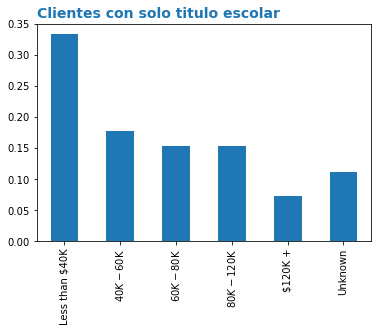

In [22]:
fig, ax = plt.subplots()
df_education_salary['High School'].plot(kind='bar')
ax.set_title('Clientes con solo titulo escolar', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

Text(0.0, 1.0, 'Clientes Graduados')

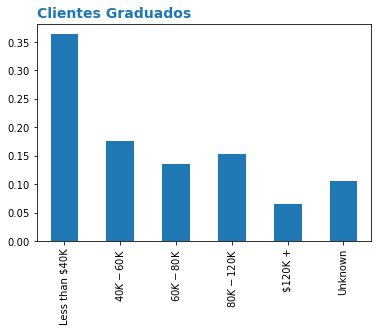

In [41]:
fig, ax = plt.subplots()
df_education_salary['Graduate'].plot(kind='bar')
ax.set_title('Clientes Graduados', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

Text(0.0, 1.0, 'Clientes no Educados')

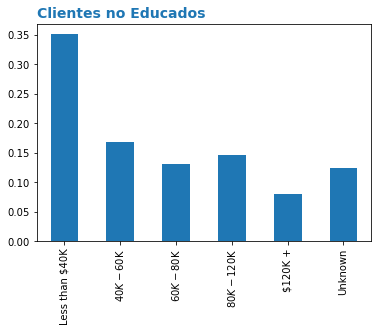

In [25]:
fig, ax = plt.subplots()
df_education_salary['Uneducated'].plot(kind='bar')
ax.set_title('Clientes no Educados', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

Text(0.0, 1.0, 'Clientes Universitarios')

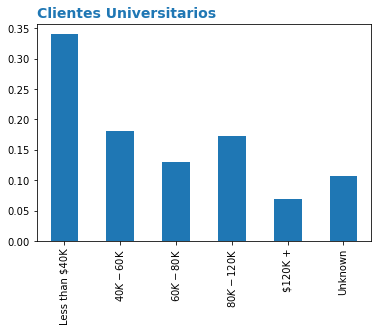

In [26]:
fig, ax = plt.subplots()
df_education_salary['College'].plot(kind='bar')
ax.set_title('Clientes Universitarios', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

Text(0.0, 1.0, 'Clientes post-graduados')

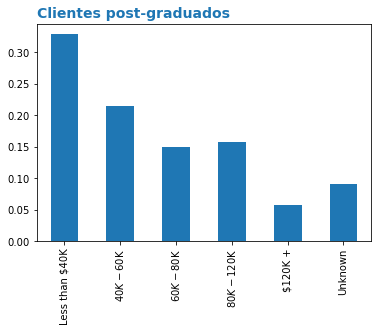

In [27]:
fig, ax = plt.subplots()
df_education_salary['Post-Graduate'].plot(kind='bar')
ax.set_title('Clientes post-graduados', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

Text(0.0, 1.0, 'Clientes con doctorado')

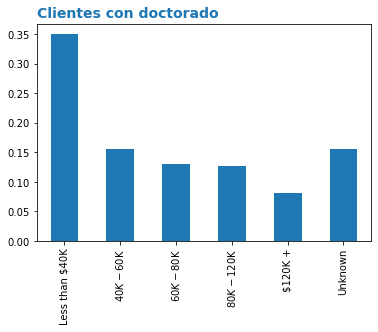

In [28]:
fig, ax = plt.subplots()
df_education_salary['Doctorate'].plot(kind='bar')
ax.set_title('Clientes con doctorado', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

Text(0.0, 1.0, 'Clientes con valores desconocidos')

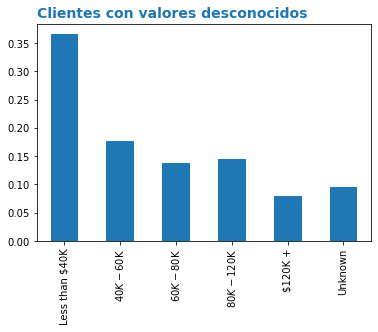

In [29]:
fig, ax = plt.subplots()
df_education_salary['Unknown'].plot(kind='bar')
ax.set_title('Clientes con valores desconocidos', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

Text(0.0, 1.0, 'Clientes que ganan menos de 40mil')

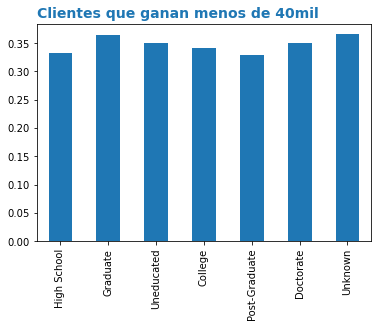

In [30]:
fig, ax = plt.subplots()
df_education_salary.loc['Less than $40K', :].plot(kind='bar')
ax.set_title('Clientes que ganan menos de 40mil', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

Text(0.0, 1.0, 'Clientes que ganan entre 40 mil y 60 mil')

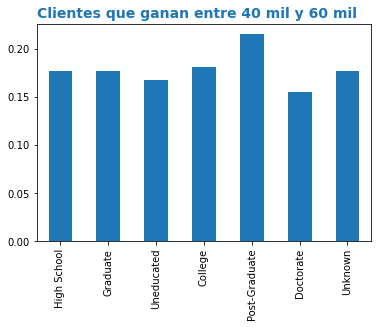

In [31]:
fig, ax = plt.subplots()
df_education_salary.loc['$40K - $60K'].plot(kind='bar')
ax.set_title('Clientes que ganan entre 40 mil y 60 mil', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

Text(0.0, 1.0, 'Clientes que ganan entre 60 mil y 80 mil')

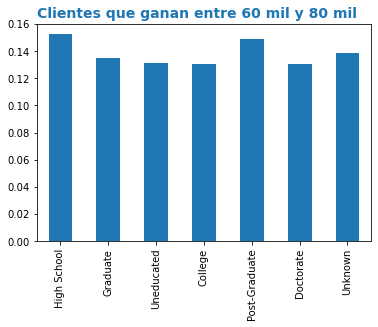

In [32]:
fig, ax = plt.subplots()
df_education_salary.loc['$60K - $80K'].plot(kind='bar')
ax.set_title('Clientes que ganan entre 60 mil y 80 mil', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

Text(0.0, 1.0, 'Clientes que ganan entre 80 mil y 120 mil')

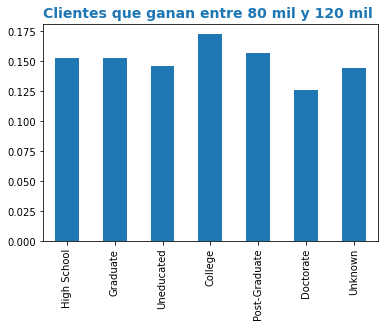

In [33]:
fig, ax = plt.subplots()
df_education_salary.loc['$80K - $120K'].plot(kind='bar')
ax.set_title('Clientes que ganan entre 80 mil y 120 mil', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

Text(0.0, 1.0, 'Clientes que ganan más de 120 mil')

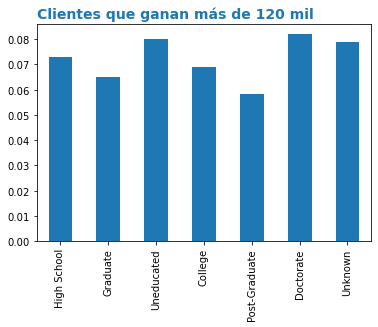

In [34]:
fig, ax = plt.subplots()
df_education_salary.loc['$120K +'].plot(kind='bar')
ax.set_title('Clientes que ganan más de 120 mil', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

Text(0.0, 1.0, 'Clientes con salario desconocido')

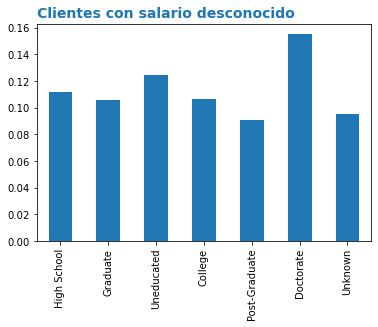

In [35]:
fig, ax = plt.subplots()
df_education_salary.loc['Unknown'].plot(kind='bar')
ax.set_title('Clientes con salario desconocido', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

## Observaciones
Podemos observar en los datos una tendencia a obtener salarios más altos cuanto mayores son los estudios realizados, siendo los postgraduados los mejor pagados. Es interesante mencionar que el título de doctorado parece estar pagado de la misma manera que los no titulados. También es interesante mencionar que la mayor proporción de personas que encajan en el rango más alto de salario son los que no tienen estudios y los doctorados.


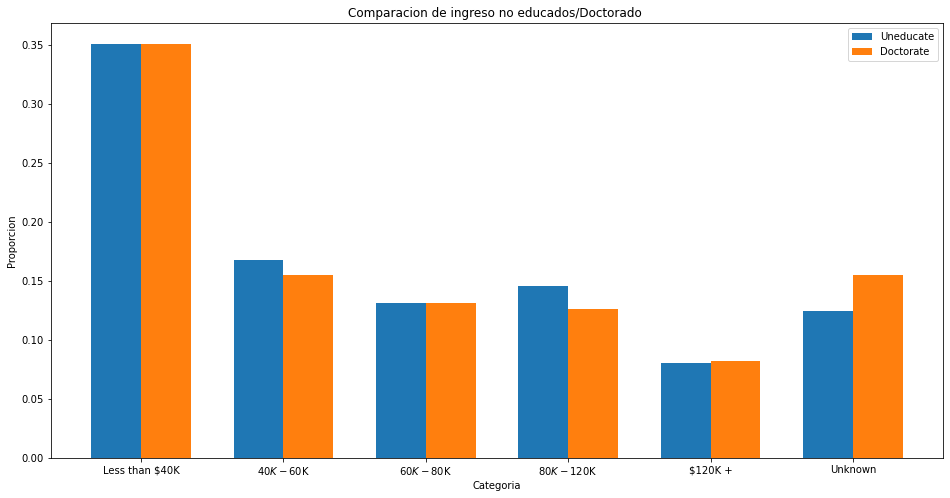

In [38]:
index = np.arange(len(index_val))
bar_width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
uneducated = ax.bar(index, df_education_salary['Uneducated'], bar_width, label="Uneducate")

doctorate = ax.bar(index+bar_width, df_education_salary['Doctorate'], bar_width, label="Doctorate")

ax.set_xlabel('Categoria')
ax.set_ylabel('Proporcion')
ax.set_title('Comparacion de ingreso no educados/Doctorado ')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index_val)
ax.legend()

plt.show()

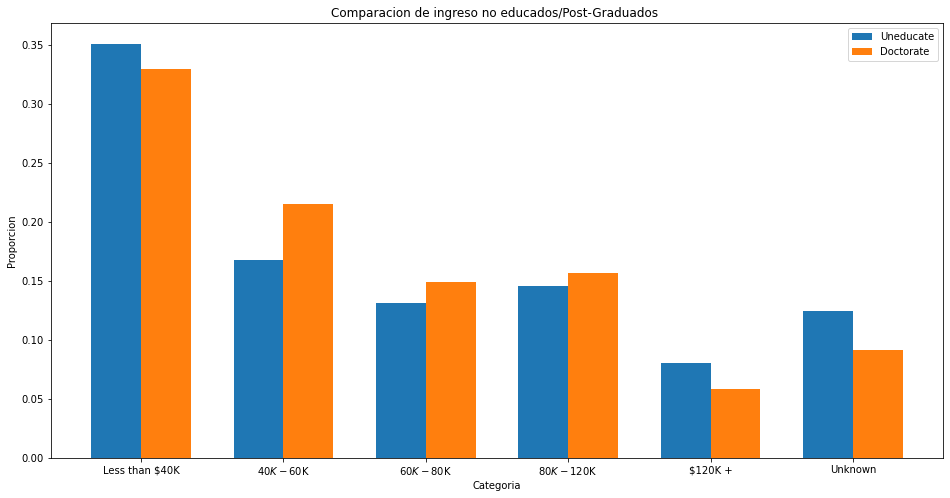

In [39]:
index = np.arange(len(index_val))
bar_width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
uneducated = ax.bar(index, df_education_salary['Uneducated'], bar_width, label="Uneducate")

doctorate = ax.bar(index+bar_width, df_education_salary['Post-Graduate'], bar_width, label="Doctorate")

ax.set_xlabel('Categoria')
ax.set_ylabel('Proporcion')
ax.set_title('Comparacion de ingreso no educados/Post-Graduados ')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index_val)
ax.legend()

plt.show()

##  Hay influencia a nivel de género con el salario?




In [79]:
df_2.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0


In [42]:
columns_sex= ['M', 'F'] #Se crea un DF que compare los sueldos segun genero
df_sexo_income= pd.DataFrame(index=index_val, columns=columns_sex)
df_sexo_income

,M,F
Less than $40K,NaN,NaN
$40K - $60K,NaN,NaN
$60K - $80K,NaN,NaN
$80K - $120K,NaN,NaN
$120K +,NaN,NaN
Unknown,NaN,NaN


In [43]:
for income in index_val: #se carga el df
    count_sex_income = df_2.loc[df_2['Income_Category']== income, ['Gender']].value_counts()
    for columna in columns_sex:
        try:
            df_sexo_income.loc[income, columna] = count_sex_income[columna].values[0]
        except:
            df_sexo_income.loc[income, columna] = 0

In [44]:
df_sexo_income

,M,F
Less than $40K,277,3284
$40K - $60K,776,1014
$60K - $80K,1402,0
$80K - $120K,1535,0
$120K +,727,0
Unknown,52,1060


In [94]:
for column in df_sexo_income.columns: #se optienen los resultados a nivel de procentajes
    df_sexo_income[column] = df_sexo_income[column] / df_sexo_income[column].sum()

In [95]:
df_sexo_income

,M,F
Less than $40K,0.0580835,0.612915
$40K - $60K,0.162718,0.18925
$60K - $80K,0.293982,0
$80K - $120K,0.32187,0
$120K +,0.152443,0
Unknown,0.0109038,0.197835


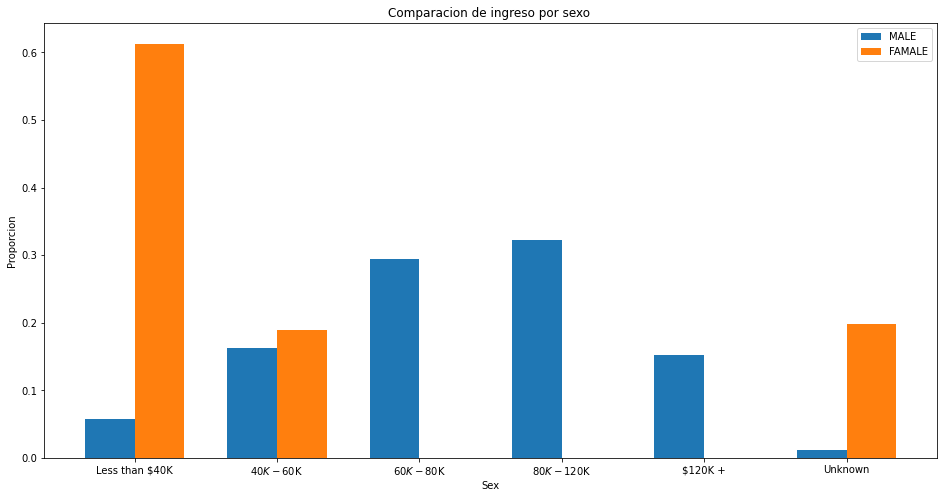

In [96]:
index = np.arange(len(index_val))
bar_width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
male = ax.bar(index, df_sexo_income['M'], bar_width, label="MALE")

famale = ax.bar(index+bar_width, df_sexo_income['F'], bar_width, label="FAMALE")

ax.set_xlabel('Sex')
ax.set_ylabel('Proporcion')
ax.set_title('Comparacion de ingreso por sexo ')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index_val)
ax.legend()

plt.show()

## Observacion
Se puede observar que las mujeres ganan menos en comparacion a la mayoria de los hombres. La mayoria de los hombres ganan mas de 60 mil, mientras que la mayoria de las mujeres ganan menos de 60 mil

## Qué género es más propenso a abandonar el banco.


In [111]:
index_val_attrition=['Existing Customer', 'Attrited Customer']
df_abandono_sexo = pd.DataFrame(index=index_val_attrition, columns=columns_sex)
df_abandono_sexo

,M,F
Existing Customer,NaN,NaN
Attrited Customer,NaN,NaN


In [112]:
for estado in index_val_attrition:
    count_estado_cliente = df_2.loc[df_2['Attrition_Flag'] == estado, ['Gender']].value_counts()
    for column in columns_sex:
        try:
            df_abandono_sexo.loc[estado, column] = count_estado_cliente[column].values[0]
        except:
            df_abandono_sexo.loc[estado, column] = 0

In [113]:
df_abandono_sexo

,M,F
Existing Customer,4072,4428
Attrited Customer,697,930


In [114]:
for column in df_abandono_sexo.columns: 
    df_abandono_sexo[column] = df_abandono_sexo[column] / df_abandono_sexo[column].sum()

In [115]:
df_abandono_sexo

,M,F
Existing Customer,0.853848,0.826428
Attrited Customer,0.146152,0.173572


Se puede observar que las mujeres son mas propensas a abandonar el banco

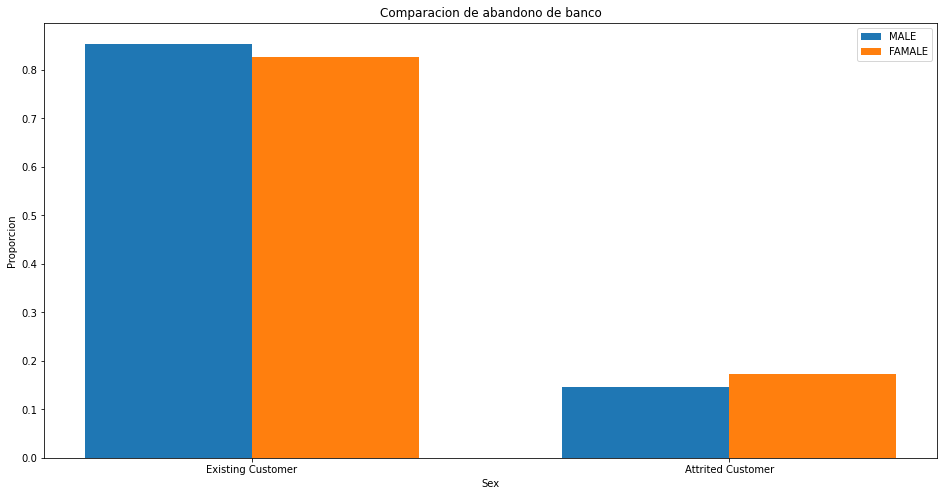

In [116]:
index = np.arange(len(index_val_attrition))
bar_width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
male = ax.bar(index, df_abandono_sexo['M'], bar_width, label="MALE")

famale = ax.bar(index+bar_width, df_abandono_sexo['F'], bar_width, label="FAMALE")

ax.set_xlabel('Sex')
ax.set_ylabel('Proporcion')
ax.set_title('Comparacion de abandono de banco')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index_val_attrition)
ax.legend()

plt.show()